In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn.impute import SimpleImputer

In [59]:
data = pd.read_csv('environment_data.csv', index_col=0)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345151 entries, 2022-11-07 00:00:01 to 2022-11-10 23:59:59
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sound     345151 non-null  float64
 1   pressure  345151 non-null  float64
 2   temp      345151 non-null  float64
 3   humidity  345151 non-null  float64
 4   voc       345151 non-null  float64
 5   pm1.0     345151 non-null  float64
 6   pm2.5     345151 non-null  float64
 7   pm10      345151 non-null  float64
 8   CO2       344264 non-null  float64
dtypes: float64(9)
memory usage: 26.3 MB


In [75]:
data.head()

,sound,pressure,temp,humidity,voc,pm1.0,pm2.5,pm10,CO2
timestamp,,,,,,,,,
2022-11-07 00:00:01,0.881076,1012.037290,24.777757,35.996349,29466.0,26.0,36.0,45.0,421.0
2022-11-07 00:00:02,0.863325,1012.025698,24.762371,36.002125,29467.0,26.0,36.0,45.0,419.0
2022-11-07 00:00:03,0.908509,1012.083523,24.767500,36.013384,29459.0,26.0,36.0,45.0,418.0
2022-11-07 00:00:04,0.924645,1012.091207,24.767500,36.013384,29454.0,26.0,36.0,44.0,418.0
2022-11-07 00:00:05,0.896406,1012.091207,24.764935,36.013405,29458.5,26.0,36.0,44.0,416.0


In [76]:
print(f"Number of NaN values in dataset:\n{data.isna().sum()}")

Number of NaN values in dataset:
sound         0
pressure      0
temp          0
humidity      0
voc           0
pm1.0         0
pm2.5         0
pm10          0
CO2         887
dtype: int64


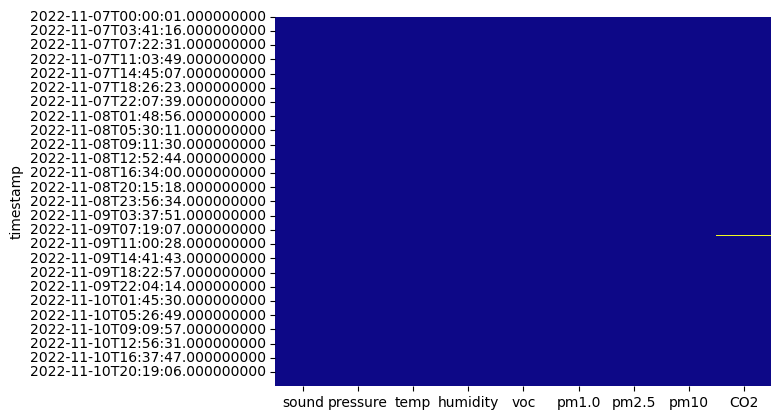

In [77]:
sns.heatmap(data.isna(), cbar=False, cmap='plasma')
plt.show()

In [78]:
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 0


In [71]:
data.index = pd.to_datetime(data.index)


In [83]:
duplicate = data[data.index.duplicated()]
duplicate

,sound,pressure,temp,humidity,voc,pm1.0,pm2.5,pm10,CO2
timestamp,,,,,,,,,
2022-11-07 01:00:00,0.927873,1012.029181,24.885456,35.769386,29454.0,25.0,36.0,44.0,449.0
2022-11-07 05:00:00,0.929487,1012.083651,24.726471,35.821613,29466.0,26.0,37.0,45.0,408.0
2022-11-07 09:00:00,0.731002,1013.577997,24.454659,38.499439,31630.0,69.0,103.0,119.0,487.0
2022-11-07 10:00:00,1.844450,1013.874410,24.449530,38.928240,30666.0,94.0,126.0,139.0,487.0
2022-11-07 11:00:00,1.591100,1014.204036,25.552171,36.589889,30518.0,46.0,78.0,92.0,436.0
2022-11-07 16:00:00,1.391002,1013.957464,25.500885,37.518162,29939.0,57.0,97.0,121.0,496.0
2022-11-08 04:00:00,0.874621,1015.260768,24.695700,37.036374,29647.0,32.0,47.0,59.0,439.0
2022-11-08 05:00:00,1.032763,1015.392091,25.167527,36.219366,29643.0,32.0,46.0,58.0,408.0
2022-11-08 07:00:00,0.916577,1015.672999,24.782885,36.691268,29551.0,31.0,46.0,57.0,425.0


In [84]:
data.describe()

,sound,pressure,temp,humidity,voc,pm1.0,pm2.5,pm10,CO2
count,345151.000000,345151.000000,345151.000000,345151.000000,345151.000000,345151.000000,345151.000000,345151.000000,344264.000000
mean,1.035109,1014.807431,25.123033,34.636160,30512.354483,49.980410,68.674444,79.883421,442.465660
std,0.493434,2.517912,1.210600,2.652997,1329.625356,27.035828,31.107893,30.668957,28.831611
min,0.000000,1005.339453,20.326285,26.962989,28427.000000,20.000000,30.000000,33.000000,400.000000
25%,0.931100,1013.215952,24.470044,32.984199,29458.000000,33.000000,48.000000,61.000000,418.000000
50%,1.035990,1014.020586,24.972642,34.628268,29964.500000,38.000000,54.000000,68.000000,440.000000
75%,1.229633,1015.415069,25.782958,36.830740,31443.000000,59.000000,85.000000,93.000000,462.000000
max,3.303227,1024.071917,28.293446,41.651724,34535.000000,270.500000,279.500000,428.000000,562.000000


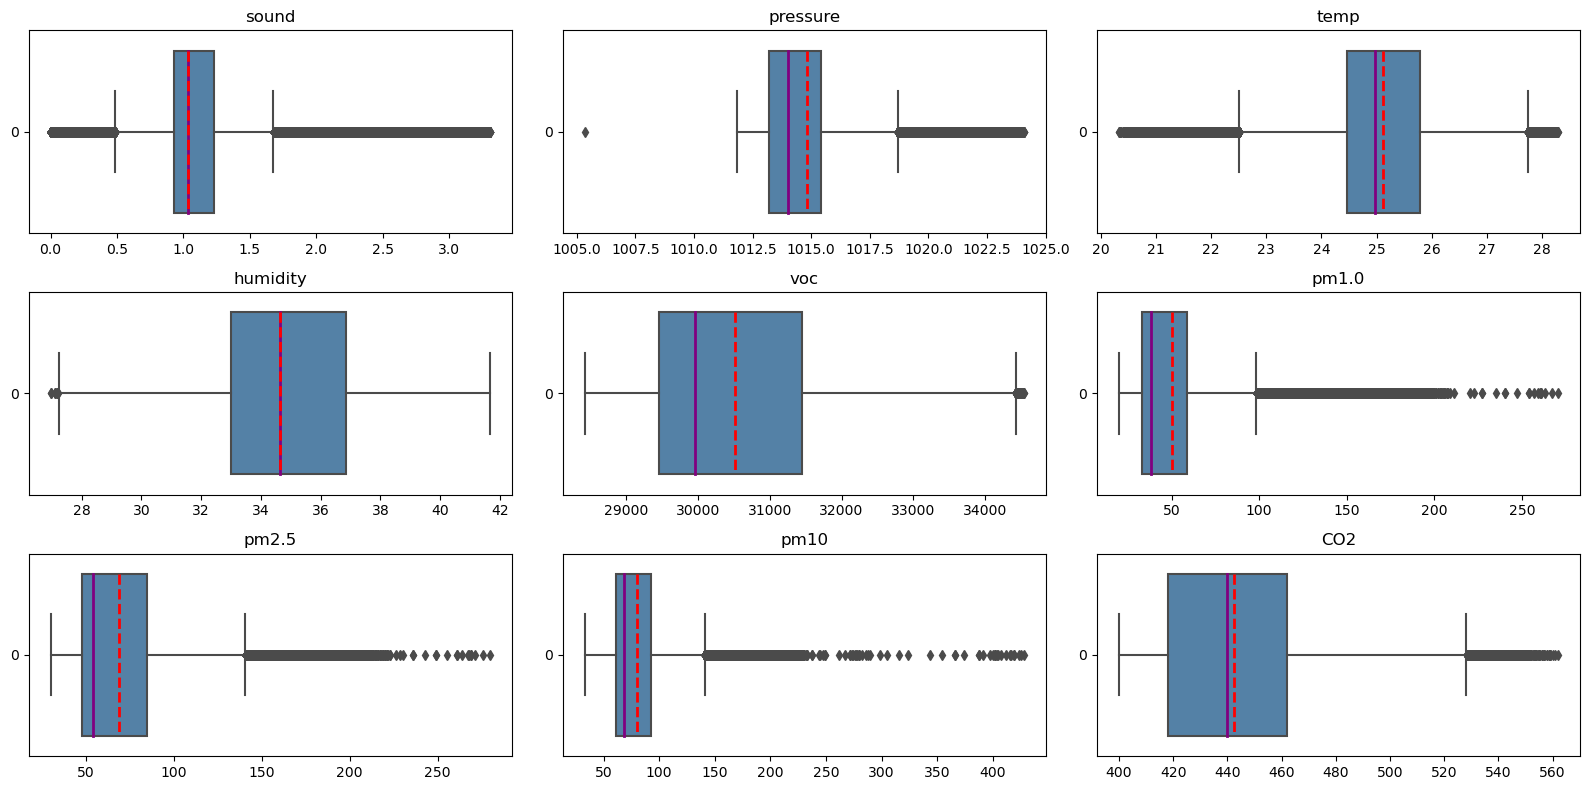

In [86]:
plt.figure(figsize=(16, 8))

for i, feature in enumerate(data_no_timestamp):
    plt.subplot(3, 3, i+1)
    plt.title(feature)
    sns.boxplot(data[feature], orient='h', color="steelblue", showmeans=True, meanline=True,
                    medianprops={'linewidth': 2, 'color': 'purple'},
                    meanprops={'linewidth': 2, 'color': 'red'})

plt.tight_layout()

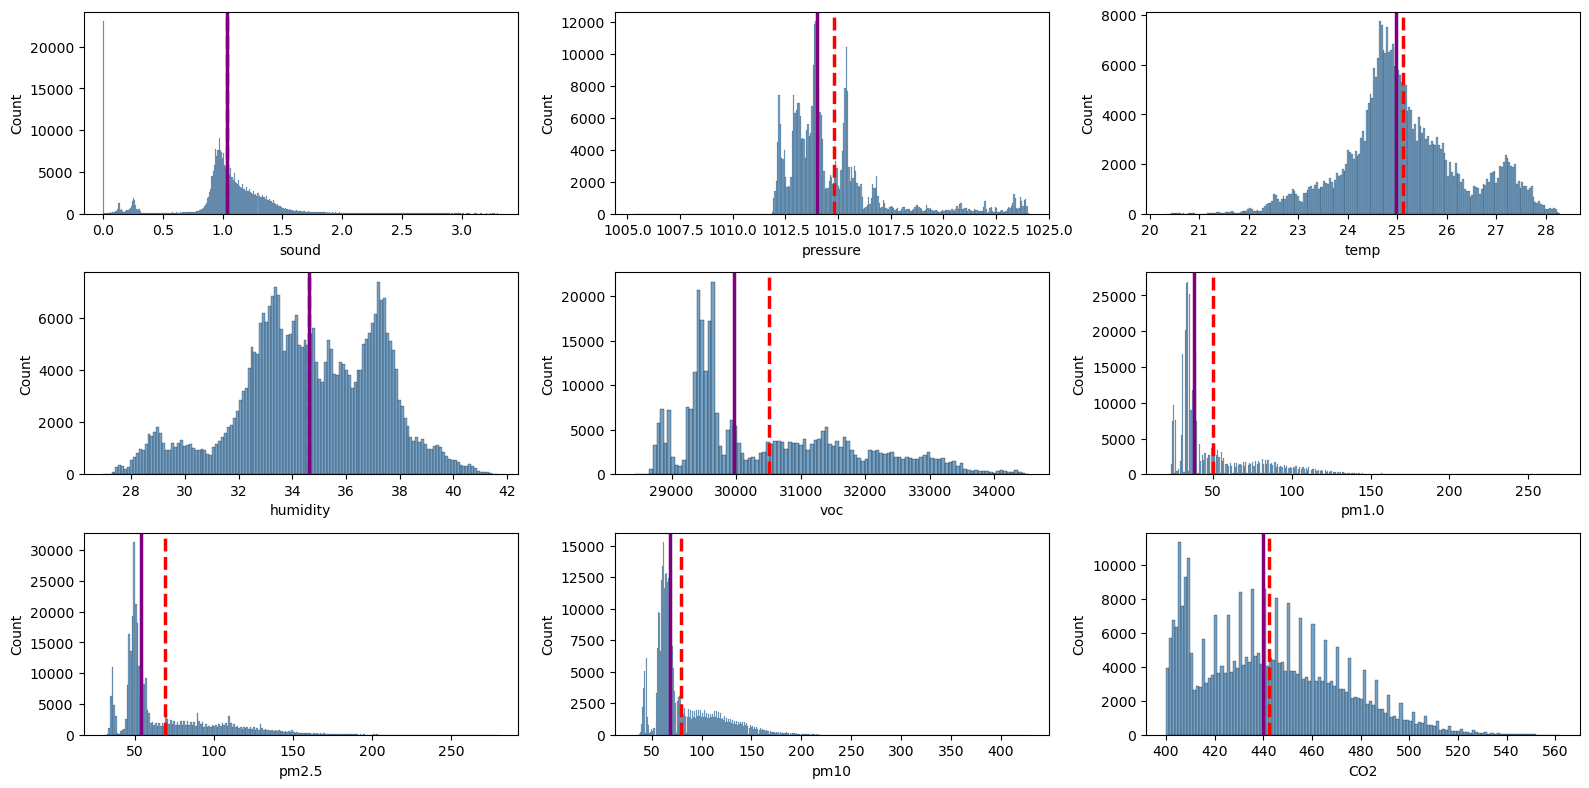

In [87]:
plt.figure(figsize=(16, 8))

for i, feature in enumerate(data):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[feature], color="steelblue")
    plt.axvline(x=data[feature].mean(), c='red', ls='--', lw=2.5)
    plt.axvline(x=data[feature].median(), c='purple', ls='-', lw=2.5)

plt.tight_layout()

In [88]:
imp = SimpleImputer(strategy="mean")
data[['CO2']] = imp.fit_transform(data[['CO2']])

CO2_nan = data["CO2"].isna().sum()
print(f"Number of missing CO2 values in dataset: {CO2_nan}")

Number of missing CO2 values in dataset: 0


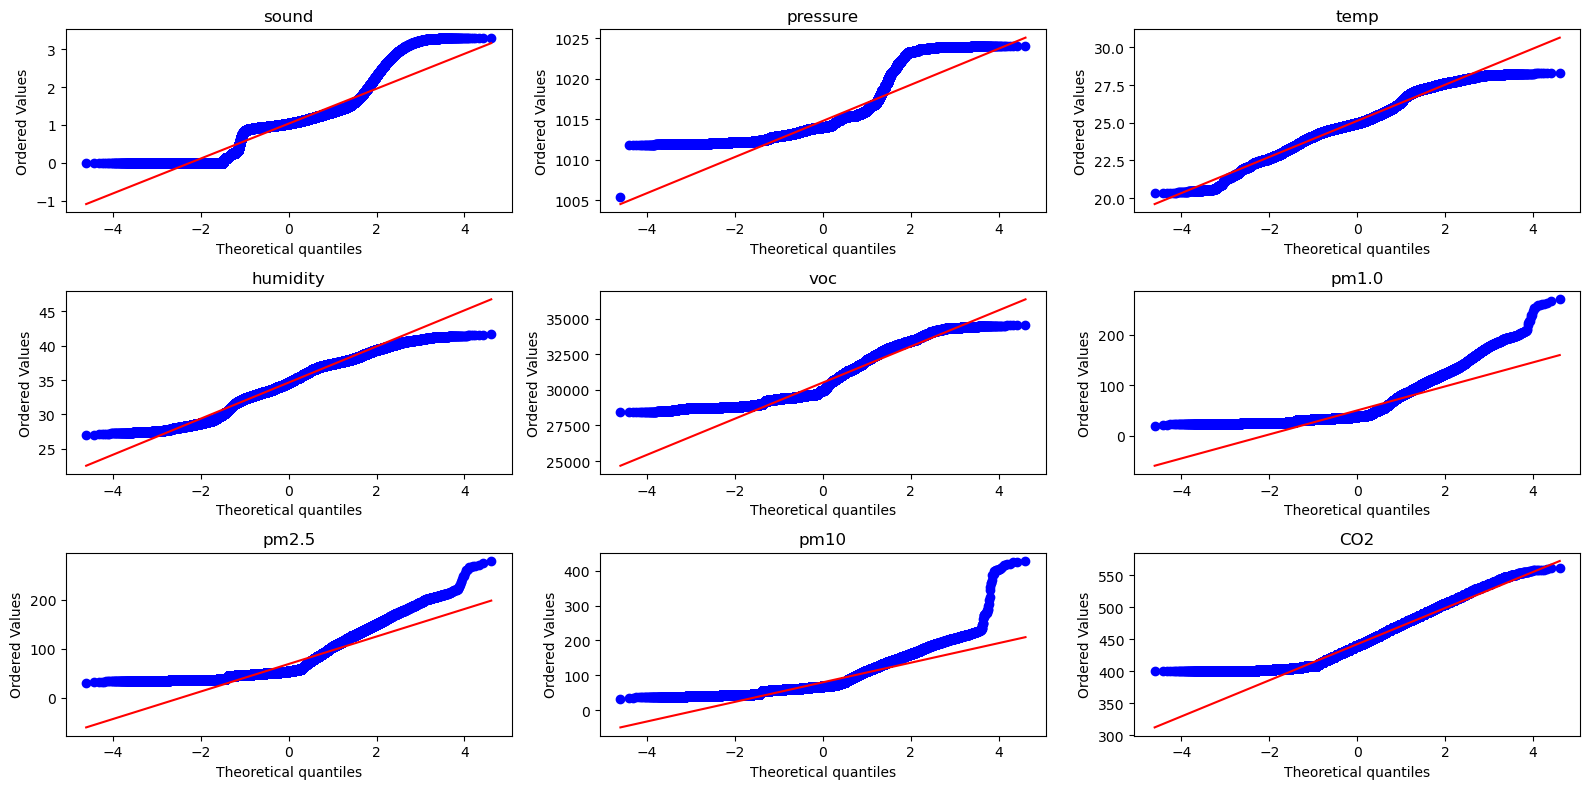

In [89]:
plt.figure(figsize=(16, 8))

for i, feature in enumerate(data):
    plt.subplot(3, 3, i+1)
    stats.probplot(data[feature], dist="norm", plot=pylab)
    plt.title(feature)

plt.tight_layout()